In [1]:
import h5py
import pandas as pd
from simpledbf import Dbf5
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
#0,County level hhs by income, jobs by sectorid 
year = 2019
run = 789
yearlist = [2019,2020,2025,2030,2040,2050]
basefile = "E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMM_Base_Year_Data\\remm_data_2019_base_year_20220915.h5"
CheckedHAFBforComparison = r"E:\Tasks\REMM-Check-Outputs\Inputs\HAFB_jobs_by_year_0821_2340.csv"
policyfile = "E:\\Projects\\REMM2_For_Python3_Internal_Use\\data\\scenario_inputs\\baseline\\zoning_parcels_p.csv"

countyIndicatorFileName = "E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\county_indicators_" + str(run) + "_" + str(year) + ".csv"
county_indicator=pd.read_csv(countyIndicatorFileName)
householdControl=pd.read_csv("E:\\Projects\\REMM2_For_Python3_Internal_Use\data\household_controls.csv")

In [3]:
#1,County level hhs by income
householdControl=pd.read_csv("E:\\Projects\\REMM2_For_Python3_Internal_Use\data\household_controls.csv")
hh_countyI =county_indicator[['county_id','households','hh_inc1','hh_inc2','hh_inc3','hh_inc4']]
hhscontrol=householdControl[householdControl['year'] == year]
hhscontrol_1=hhscontrol[hhscontrol['income_quartile'] == 1]
hhscontrol_1=hhscontrol_1[['cid','number_of_households']]
hhscontrol_1.columns = ['county_id','hh_inc1_c']
hhscontrol_2=hhscontrol[hhscontrol['income_quartile'] == 2]
hhscontrol_2=hhscontrol_2[['cid','number_of_households']]
hhscontrol_2.columns = ['county_id','hh_inc2_c']
hhscontrol_3=hhscontrol[hhscontrol['income_quartile'] == 3]
hhscontrol_3=hhscontrol_3[['cid','number_of_households']]
hhscontrol_3.columns = ['county_id','hh_inc3_c']
hhscontrol_4=hhscontrol[hhscontrol['income_quartile'] == 4]
hhscontrol_4=hhscontrol_4[['cid','number_of_households']]
hhscontrol_4.columns = ['county_id','hh_inc4_c']
hh_check_result = hh_countyI.merge(hhscontrol_1,on='county_id').merge(hhscontrol_2,on='county_id').merge(hhscontrol_3,on='county_id').merge(hhscontrol_4,on='county_id')
hh_check_result['households_c'] = hh_check_result['hh_inc1_c']+hh_check_result['hh_inc2_c']+hh_check_result['hh_inc3_c']+hh_check_result['hh_inc4_c']
hh_check_result['hhdifpct'] = (hh_check_result['households'] -hh_check_result['households_c'])/hh_check_result['households_c']
hh_check_result['hhinc1difpct'] = (hh_check_result['hh_inc1'] -hh_check_result['hh_inc1_c'])/hh_check_result['hh_inc1_c']
hh_check_result['hhinc2difpct'] = (hh_check_result['hh_inc2'] -hh_check_result['hh_inc2_c'])/hh_check_result['hh_inc2_c']
hh_check_result['hhinc3difpct'] = (hh_check_result['hh_inc3'] -hh_check_result['hh_inc3_c'])/hh_check_result['hh_inc3_c']
hh_check_result['hhinc4difpct'] = (hh_check_result['hh_inc4'] -hh_check_result['hh_inc4_c'])/hh_check_result['hh_inc4_c']
hh_check_result.style.format({'households': "{:,}",'hh_inc1': "{:,}",'hh_inc2': "{:,}",'hh_inc3': "{:,}",'hh_inc4': "{:,}",'hh_inc1_c': "{:,}",'hh_inc2_c': "{:,}",'hh_inc3_c': "{:,}",'hh_inc4_c': "{:,}",'households_c':"{:,}",'hhdifpct':"{:.1%}",'hhinc1difpct': "{:.1%}",'hhinc2difpct': "{:.1%}",'hhinc3difpct': "{:.1%}",'hhinc4difpct': "{:.1%}"})

,county_id,households,hh_inc1,hh_inc2,hh_inc3,hh_inc4,hh_inc1_c,hh_inc2_c,hh_inc3_c,hh_inc4_c,households_c,hhdifpct,hhinc1difpct,hhinc2difpct,hhinc3difpct,hhinc4difpct
0,11,"110,563","22,899","25,116","34,930","27,618","22,881","25,097","34,905","27,613","110,496",0.1%,0.1%,0.1%,0.1%,0.0%
1,35,"399,008","108,941","90,963","105,337","93,767","108,940","90,958","105,334","93,755","398,987",0.0%,0.0%,0.0%,0.0%,0.0%
2,49,"178,527","46,316","40,531","50,871","40,809","46,317","40,536","50,874","40,821","178,548",-0.0%,-0.0%,-0.0%,-0.0%,-0.0%
3,57,"86,042","27,407","21,534","23,785","13,316","27,425","21,553","23,810","13,321","86,109",-0.1%,-0.1%,-0.1%,-0.1%,-0.0%


In [4]:
#2,County level hhs by income, jobs by sectorid 
employmentdControl=pd.read_csv("E:\\Projects\\REMM2_For_Python3_Internal_Use\data\employment_controls.csv")
job_countyI =county_indicator[['county_id','jobs','jobs1','jobs2','jobs3','jobs4','jobs5','jobs6','jobs7','jobs8','jobs9','jobs10']]
employmentdControl=employmentdControl[employmentdControl['year'] == year]
employmentdControl_1=employmentdControl[employmentdControl['sector_id'] == 1]
employmentdControl_1=employmentdControl_1[['cid','number_of_jobs']]
employmentdControl_1.columns = ['county_id','jobs1_c']
employmentdControl_2=employmentdControl[employmentdControl['sector_id'] == 2]
employmentdControl_2=employmentdControl_2[['cid','number_of_jobs']]
employmentdControl_2.columns = ['county_id','jobs2_c']
employmentdControl_3=employmentdControl[employmentdControl['sector_id'] == 3]
employmentdControl_3=employmentdControl_3[['cid','number_of_jobs']]
employmentdControl_3.columns = ['county_id','jobs3_c']
employmentdControl_4=employmentdControl[employmentdControl['sector_id'] == 4]
employmentdControl_4=employmentdControl_4[['cid','number_of_jobs']]
employmentdControl_4.columns = ['county_id','jobs4_c']
employmentdControl_5=employmentdControl[employmentdControl['sector_id'] == 5]
employmentdControl_5=employmentdControl_5[['cid','number_of_jobs']]
employmentdControl_5.columns = ['county_id','jobs5_c']
employmentdControl_6=employmentdControl[employmentdControl['sector_id'] == 6]
employmentdControl_6=employmentdControl_6[['cid','number_of_jobs']]
employmentdControl_6.columns = ['county_id','jobs6_c']
employmentdControl_7=employmentdControl[employmentdControl['sector_id'] == 7]
employmentdControl_7=employmentdControl_7[['cid','number_of_jobs']]
employmentdControl_7.columns = ['county_id','jobs7_c']
employmentdControl_8=employmentdControl[employmentdControl['sector_id'] == 8]
employmentdControl_8=employmentdControl_8[['cid','number_of_jobs']]
employmentdControl_8.columns = ['county_id','jobs8_c']
employmentdControl_9=employmentdControl[employmentdControl['sector_id'] == 9]
employmentdControl_9=employmentdControl_9[['cid','number_of_jobs']]
employmentdControl_9.columns = ['county_id','jobs9_c']
employmentdControl_10=employmentdControl[employmentdControl['sector_id'] == 10]
employmentdControl_10=employmentdControl_10[['cid','number_of_jobs']]
employmentdControl_10.columns = ['county_id','jobs10_c']
emp_check_result = job_countyI.merge(employmentdControl_1,on='county_id').merge(employmentdControl_2,on='county_id').merge(employmentdControl_3,on='county_id').merge(employmentdControl_4,on='county_id').merge(employmentdControl_5,on='county_id').merge(employmentdControl_6,on='county_id').merge(employmentdControl_7,on='county_id').merge(employmentdControl_8,on='county_id').merge(employmentdControl_9,on='county_id').merge(employmentdControl_10,on='county_id')
emp_check_result['job1difpct'] = (emp_check_result['jobs1'] -emp_check_result['jobs1_c'])/emp_check_result['jobs1_c']
emp_check_result['job2difpct'] = (emp_check_result['jobs2'] -emp_check_result['jobs2_c'])/emp_check_result['jobs2_c']
emp_check_result['job3difpct'] = (emp_check_result['jobs3'] -emp_check_result['jobs3_c'])/emp_check_result['jobs3_c']
emp_check_result['job4difpct'] = (emp_check_result['jobs4'] -emp_check_result['jobs4_c'])/emp_check_result['jobs4_c']
emp_check_result['job5difpct'] = (emp_check_result['jobs5'] -emp_check_result['jobs5_c'])/emp_check_result['jobs6_c']
emp_check_result['job6difpct'] = (emp_check_result['jobs6'] -emp_check_result['jobs6_c'])/emp_check_result['jobs6_c']
emp_check_result['job7difpct'] = (emp_check_result['jobs7'] -emp_check_result['jobs7_c'])/emp_check_result['jobs7_c']
emp_check_result['job8difpct'] = (emp_check_result['jobs8'] -emp_check_result['jobs8_c'])/emp_check_result['jobs8_c']
emp_check_result['job9difpct'] = (emp_check_result['jobs9'] -emp_check_result['jobs9_c'])/emp_check_result['jobs9_c']
emp_check_result['job10difpct'] = (emp_check_result['jobs10'] -emp_check_result['jobs10_c'])/emp_check_result['jobs10_c']
emp_check_result.style.format({'jobs': "{:,}",'jobs1': "{:,}",'jobs2': "{:,}",'jobs3': "{:,}",'jobs4': "{:,}",'jobs_c': "{:,}",'jobs2_c': "{:,}",'jobs3_c': "{:,}",'jobs4_c': "{:,}",'jobs1difpct': "{:.1%}",'jobs2difpct': "{:.1%}",'jobs3difpct': "{:.1%}",'jobs4difpct': "{:.1%}",'jobs5difpct': "{:.1%}",'jobs6difpct': "{:.1%}",'jobs7difpct': "{:.1%}",'jobs8difpct': "{:.1%}",'jobs9difpct': "{:.1%}",'jobs10difpct': "{:.1%}"})

,county_id,jobs,jobs1,jobs2,jobs3,jobs4,jobs5,jobs6,jobs7,jobs8,jobs9,jobs10,jobs1_c,jobs2_c,jobs3_c,jobs4_c,jobs5_c,jobs6_c,jobs7_c,jobs8_c,jobs9_c,jobs10_c,job1difpct,job2difpct,job3difpct,job4difpct,job5difpct,job6difpct,job7difpct,job8difpct,job9difpct,job10difpct
0,11,"178,714","10,863",0.0,"40,714","15,859",14769,18991,46724,0.000000,20064,10730,10863,"13,618","40,714","15,859",14769,18991,46724,150,20064,10730,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
1,35,"867,040","55,502",0.0,"140,749","73,790",59851,118799,247701,0.000000,85778,84870,55502,"52,051","140,749","73,790",59851,118799,247701,3526,85778,84870,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
2,49,"331,453","20,690",0.0,"58,372","32,847",21610,54353,85239,0.000000,42926,15416,20690,"30,193","58,372","32,847",21610,54353,85239,667,42926,15416,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
3,57,"128,949","8,250",0.0,"23,865","14,497",15224,9083,34562,0.000000,15279,8189,8250,"8,672","23,865","14,497",15224,9083,34562,143,15279,8189,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000


In [5]:
#3,Hill Air Force refer to redevelopment.ipynb
#HAF Jobs
# tazs= 527,540,541,623,626,628,629,630,631,632,633,634,644,647]
# checked0821 basefile "E:\temp\HAFB_jobs_by_year_0821_2340.csv"
Buildings = pd.read_csv(r"E:\Tasks\REMM-Check-Outputs\Inputs\HAFBtaz.csv")
jobsBase = pd.read_hdf(basefile, 'jobs')
jobParcel=jobsBase.groupby(['building_id']).count().reset_index()
jobsHAFB = pd.merge(jobParcel, Buildings, how="left", on=["building_id", "building_id"])
jobsHAFB=jobsHAFB[jobsHAFB['TAZ']>0]
jobsHAFB['yr'] = 0
for yr in yearlist:
    progression_jobs = pd.read_csv("E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\run"+str(run)+"year" + str(yr) + "_jobs.csv",index_col = "building_id")
    jobParcel_y=progression_jobs.groupby('building_id').count().reset_index()
    jobParcel_y = pd.merge(jobParcel_y, Buildings, how="left", on=["building_id", "building_id"])
    jobParcel_y=jobParcel_y[jobParcel_y['TAZ'] > 0].copy()
    jobParcel_y['yr'] = yr
    jobsHAFB = jobsHAFB.append(jobParcel_y)
jobsHAFB=jobsHAFB[['building_id','cid','yr','TAZ']]    
jobsHAFB.to_csv('HAFB_jobs_by_year_taz_0821_'+str(run)+'.csv')
hops=jobsHAFB.groupby(['yr']).sum().reset_index()
hops=hops[['yr','cid']]
hops.columns =['year','HAFBjobs']
checked = pd.read_csv(CheckedHAFBforComparison)
checked=checked[['year','cid']]
checked.columns =['year','HAFBjobsChecked']
HAFB_check_result = hops.merge(checked,on='year')
HAFB_check_result['dif'] = HAFB_check_result['HAFBjobs']-HAFB_check_result['HAFBjobsChecked']
HAFB_check_result['difpct'] = HAFB_check_result['dif']/HAFB_check_result['HAFBjobsChecked']
# HAFB_check_result.style.format({'HAFBjobs': "{:,}",'HAFBjobsChecked': "{:,}",'difpct':"{:.1%}"})
HAFB_check_result.to_csv('HAFB_jobs_by_year_'+str(run)+'.csv')


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will 

In [6]:
progression_jobs.groupby('building_id').count().reset_index()

,building_id,Unnamed: 0,cid,sector_id,node_id,zone_id,building_type_id,parcel_id,county_id,distlrg_id,distmed_id,distsml_id,b_year_built
0,2,967,967,967,967,967,967,967,967,967,967,967,967
1,3,6,6,6,6,6,6,6,6,6,6,6,6
2,4,12,12,12,12,12,12,12,12,12,12,12,12
3,5,24,24,24,24,24,24,24,24,24,24,24,24
4,6,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37922,860244,15,15,15,15,15,15,15,15,15,15,15,15
37923,860247,1,1,1,1,1,1,1,1,1,1,1,1
37924,860249,32,32,32,32,32,32,32,32,32,32,32,32
37925,860250,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
#4,1centers refer to redevelopment.ipynb
#policy parcels DU and JobSpace by areaName 
parcels = pd.read_csv(policyfile)
parcels =parcels[['parcel_id','TAZID_900','AreaName','locnote']].copy()
parcels = parcels.sort_values(by=['parcel_id','TAZID_900','AreaName','locnote'])
parcels = parcels.drop_duplicates(subset=['parcel_id','TAZID_900','AreaName','locnote'], keep='last')
col_names =  ['Year', 'parcel_id','locnote','AreaName', 'residential_units','job_spaces']
my_df  = pd.DataFrame(columns = col_names)
for yr in yearlist:#
    #print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv")
    progression1 =progression[['parcel_id','job_spaces','building_id','year_built','residential_units','county_id']]
    progression2=pd.merge(progression1, parcels, how="left", on=["parcel_id", "parcel_id"])
    progression3=progression2[['parcel_id','locnote','AreaName', 'residential_units','job_spaces','county_id']].copy()
    progression3['Year']=yr
    my_df = my_df.append(progression3, ignore_index=True)
result=my_df.groupby(['Year','AreaName']).sum().reset_index()
result.to_csv('DU_JSbyPolicyAreaNameYear_'+str(run)+'.csv')

result_loc=my_df.groupby(['Year','county_id','locnote']).sum().reset_index()
result_loc.to_csv('DU_JSbyPolicylocnoteYear_'+str(run)+'.csv')

In [8]:
# #4,centers charts refer to redevelopment.ipynb
# Area_name =  result.AreaName.values.tolist()
# for area in Area_name:
#     thisarea = result[result['AreaName'] == area]
#     thisarea.plot(x='Year', y = 'residential_units') #, kind='scatter'
#     plt.title(area + ' Dwelling Units')
#     plt.show()
#     thisarea.plot(x='Year', y = 'job_spaces') #, kind='scatter'
#     plt.title(area + ' Job Space')
#     plt.show()

In [9]:
#4,2 DU and JobSpace by county
col_names =  ['Year', 'parcel_id','county_id','job_spaces','building_id','year_built','residential_units']
my_df  = pd.DataFrame(columns = col_names)
for yr in yearlist:#
    #print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv")
    progression =progression[['parcel_id','county_id','job_spaces','building_id','year_built','residential_units']].copy()
    progression['Year']=yr
    my_df = my_df.append(progression, ignore_index=True)
result=my_df.groupby(['Year','county_id']).sum().reset_index()
result.to_csv('DU_JSbyCountyYear_'+str(run)+'.csv')

my_df_wfrc=my_df.loc[my_df['county_id'].isin([11,35,57])]
my_df_wfrc=my_df_wfrc[['Year','residential_units','job_spaces']].copy()
result_wfrc=my_df_wfrc.groupby(['Year']).sum().reset_index()
result_wfrc.to_csv('DU_JS_WFRC_ByYear_'+str(run)+'.csv')

In [10]:
#5,MF/SF at regional and county level
col_names_region =  ['Year','SF','MF']
regional_DU_byYear  = pd.DataFrame(columns = col_names_region)
col_names_county =  ['county_id','Year','SF','MF']
county_DU_byYear  = pd.DataFrame(columns = col_names_county)
for yr in yearlist:#[2019]: 
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv")
    progression =progression[['county_id','building_type_id','year_built','residential_units']]
    result0=progression.groupby(['building_type_id']).sum().reset_index()
    result0=result0[['building_type_id','residential_units']]
    result0['Year']=yr
    result_1=result0[result0['building_type_id'] == 1]
    result_1=result_1[['Year','residential_units']]
    result_1.columns = ['Year','SF']
    result_2=result0[result0['building_type_id'] == 2]
    result_2=result_2[['Year','residential_units']]
    result_2.columns = ['Year','MF']
    result = result_1.merge(result_2,on='Year')
    regional_DU_byYear = regional_DU_byYear.append(result, ignore_index=True)
    
    cresult0=progression.groupby(['county_id','building_type_id']).sum().reset_index()
    cresult0=cresult0[['county_id','building_type_id','residential_units']]
    cresult0['Year']=yr
    cresult_1=cresult0[cresult0['building_type_id'] == 1]
    cresult_1=cresult_1[['county_id','Year','residential_units']]
    cresult_1.columns = ['county_id','Year','SF']
    cresult_2=cresult0[cresult0['building_type_id'] == 2]
    cresult_2=cresult_2[['county_id','Year','residential_units']]
    cresult_2.columns = ['county_id','Year','MF']
    cresult = cresult_1.merge(cresult_2,on=['county_id','Year'])
    county_DU_byYear = county_DU_byYear.append(cresult, ignore_index=True)  
    
regional_DU_byYear.to_csv('RegionalSFMFbyYear'+str(run)+'.csv')
county_DU_byYear.to_csv('CountySFMFbyYear'+str(run)+'.csv')

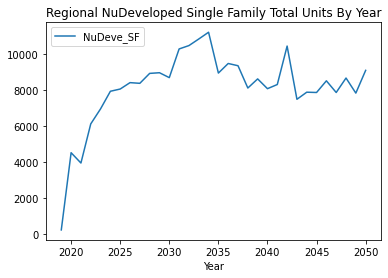

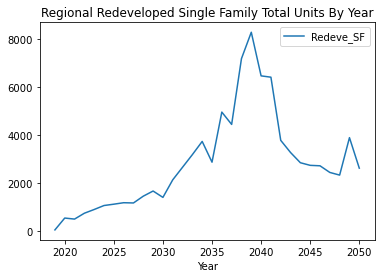

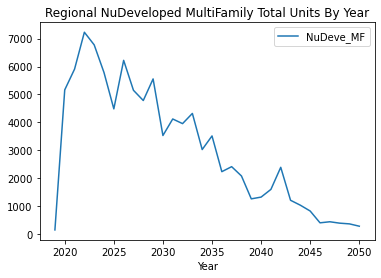

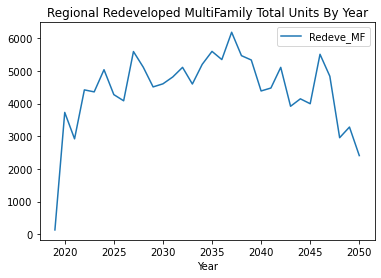

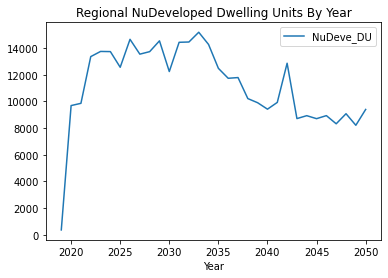

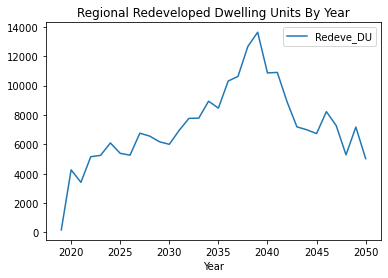

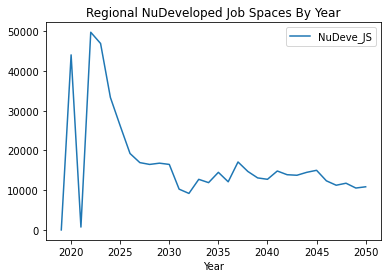

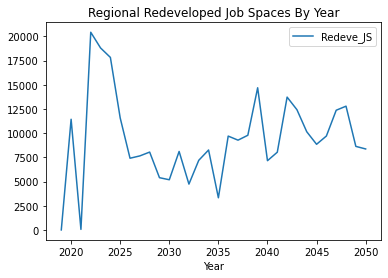

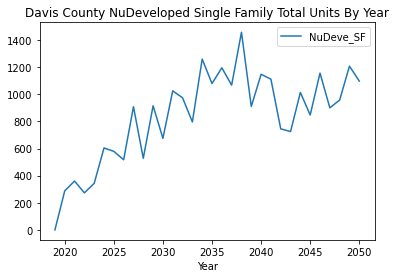

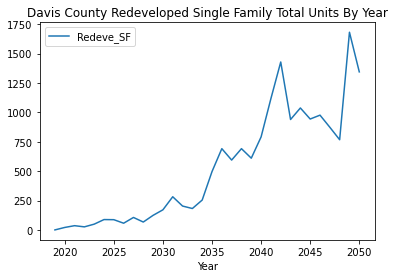

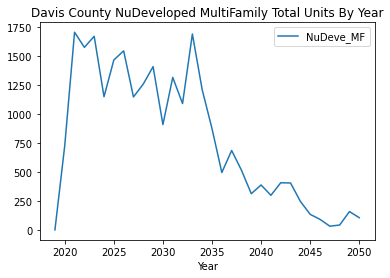

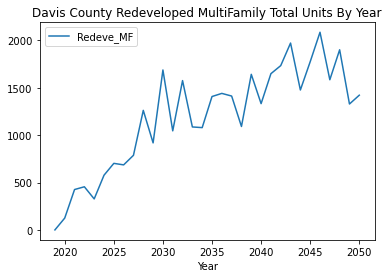

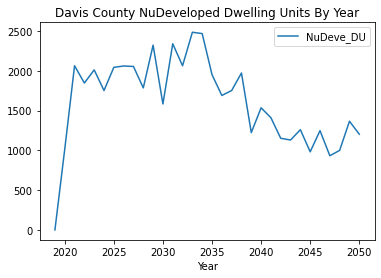

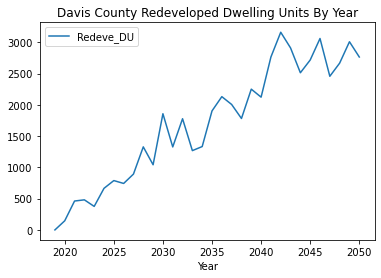

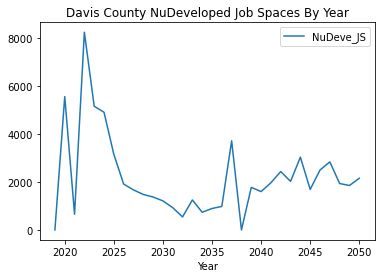

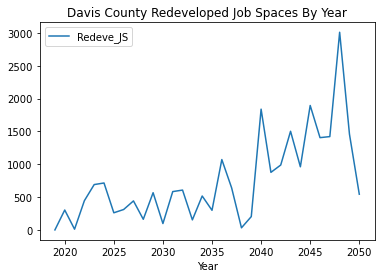

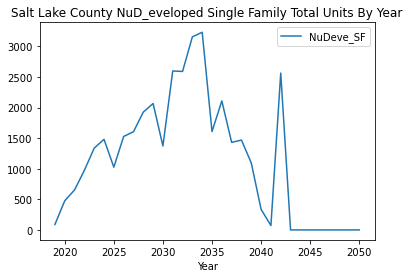

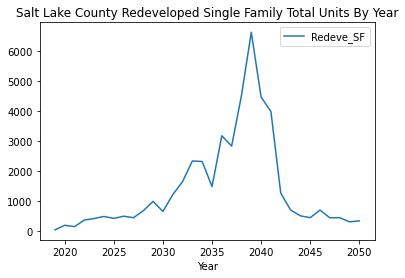

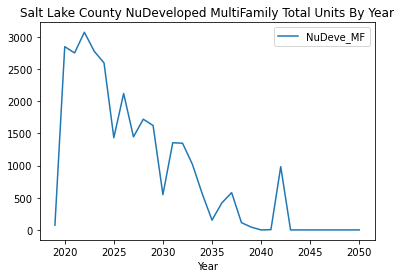

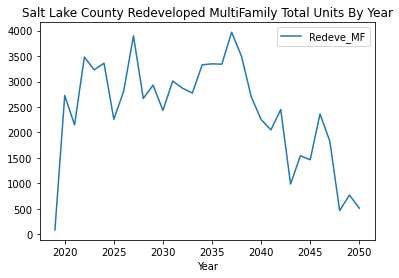

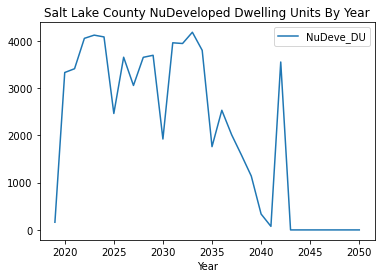

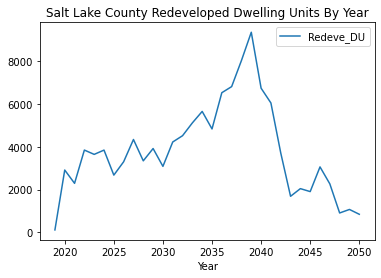

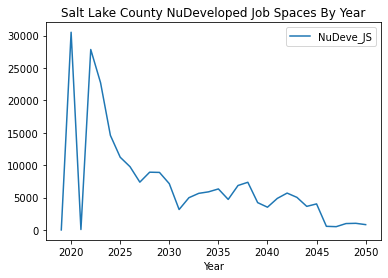

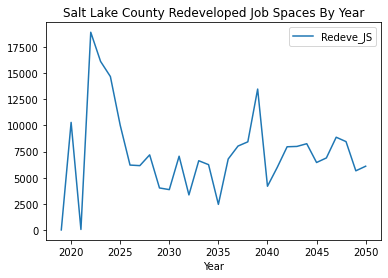

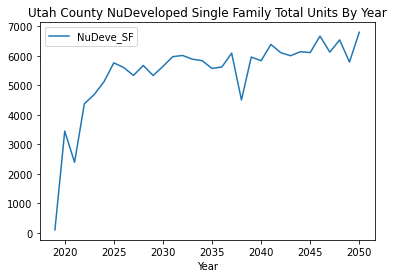

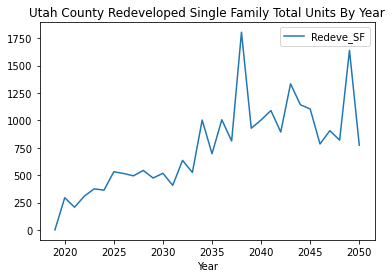

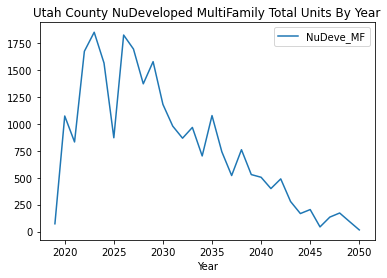

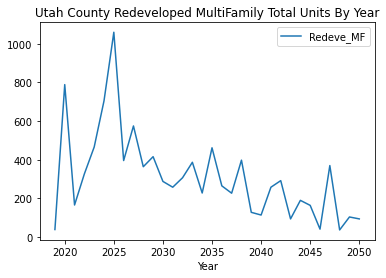

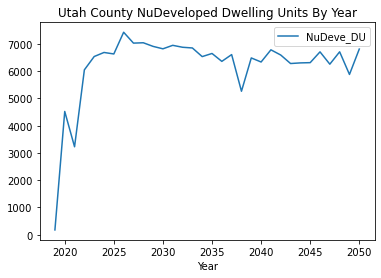

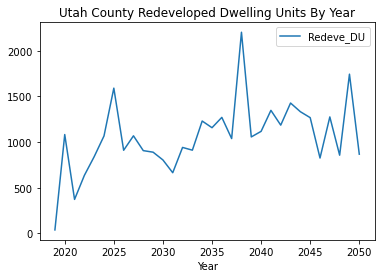

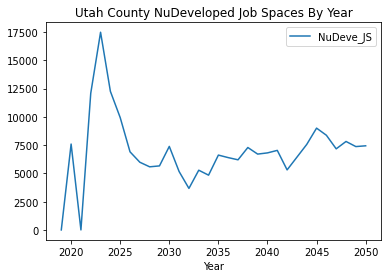

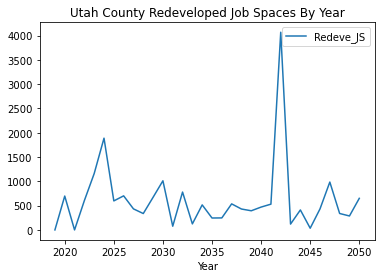

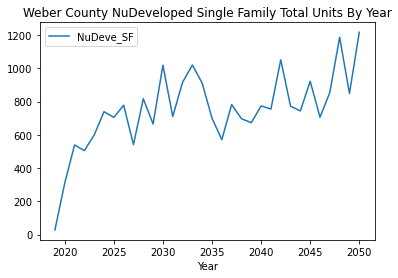

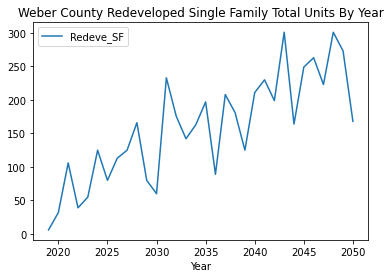

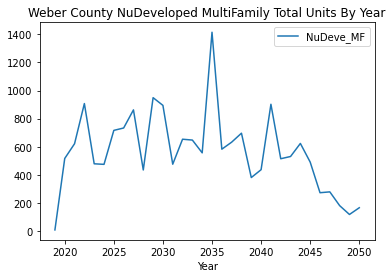

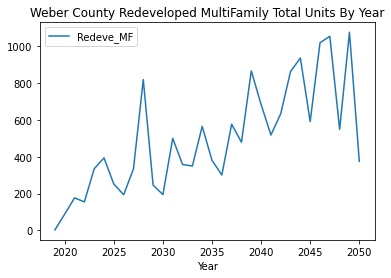

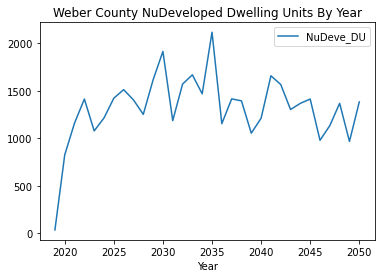

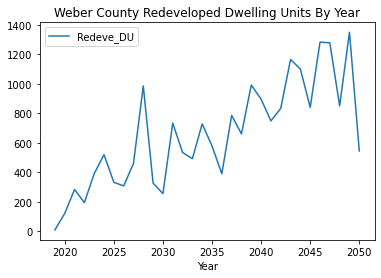

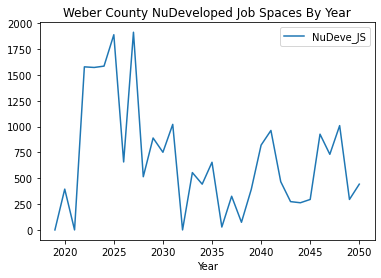

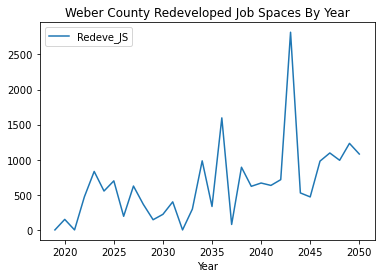

In [11]:
#6,1 redevelopment region, county, centers
# regiona, county level
col_names =  ['Year', 'Redeve_SF', 'Redeve_MF','Redeve_DU','Redeve_JS' ]
my_df_00  = pd.DataFrame(columns = col_names)
my_df_11  = pd.DataFrame(columns = col_names)
my_df_35  = pd.DataFrame(columns = col_names)
my_df_49  = pd.DataFrame(columns = col_names)
my_df_57  = pd.DataFrame(columns = col_names)

col_names_NuD =  ['Year', 'NuDeve_SF', 'NuDeve_MF','NuDeve_DU','NuDeve_JS' ]
NuD_my_df_00  = pd.DataFrame(columns = col_names_NuD)
NuD_my_df_11  = pd.DataFrame(columns = col_names_NuD)
NuD_my_df_35  = pd.DataFrame(columns = col_names_NuD)
NuD_my_df_49  = pd.DataFrame(columns = col_names_NuD)
NuD_my_df_57  = pd.DataFrame(columns = col_names_NuD)

for year in range(2019,2051):
    #print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv",index_col = "parcel_id")

    ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)]
    ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)]
    ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)]
    valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
    my_df_00 = my_df_00.append(valueDict, ignore_index=True)
    
    ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 11)]
    ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 11)]
    ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 11)]
    valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
    my_df_11 = my_df_11.append(valueDict, ignore_index=True)
    
    ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 35)]
    ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 35)]
    ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 35)]
    valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
    my_df_35 = my_df_35.append(valueDict, ignore_index=True)
    
    ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 49)]
    ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 49)]
    ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 49)]
    valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
    my_df_49 = my_df_49.append(valueDict, ignore_index=True)
    
    ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 57)]
    ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 57)]
    ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 57)]
    valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
    my_df_57 = my_df_57.append(valueDict, ignore_index=True)
    
    NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)]
    NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)]
    NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)]
    valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
    NuD_my_df_00 = NuD_my_df_00.append(valueDict, ignore_index=True)
    
    NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 11)]
    NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 11)]
    NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 11)]
    valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
    NuD_my_df_11 = NuD_my_df_11.append(valueDict, ignore_index=True)
    
    NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 35)]
    NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 35)]
    NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 35)]
    valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
    NuD_my_df_35 = NuD_my_df_35.append(valueDict, ignore_index=True)
    
    NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 49)]
    NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 49)]
    NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 49)]
    valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
    NuD_my_df_49 = NuD_my_df_49.append(valueDict, ignore_index=True)
    
    NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 57)]
    NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 57)]
    NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 57)]
    valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
    NuD_my_df_57 = NuD_my_df_57.append(valueDict, ignore_index=True)
    
Davis_DU_JS = NuD_my_df_11.merge(my_df_11, on = 'Year')
Davis_DU_JS['Davis']= Davis_DU_JS['Year']
Davis_DU_JS['NuDeve_DU']= Davis_DU_JS['NuDeve_SF'] + Davis_DU_JS['NuDeve_MF']
Davis_DU_JS['Redeve_DU']= Davis_DU_JS['Redeve_SF'] + Davis_DU_JS['Redeve_MF']
Davis_DU_JS['DU_Built'] = Davis_DU_JS['NuDeve_SF'] + Davis_DU_JS['NuDeve_MF'] +  Davis_DU_JS['Redeve_SF'] + Davis_DU_JS['Redeve_MF']
Davis_DU_JS['JS_Built'] = Davis_DU_JS['NuDeve_JS'] + Davis_DU_JS['Redeve_JS']
Davis_DU_JS.to_csv('Davis_County_DU_JS_By_Year_'+str(run)+'.csv')

SaltL_DU_JS = NuD_my_df_35.merge(my_df_35, on = 'Year')
SaltL_DU_JS['SaltLake']= SaltL_DU_JS['Year']
SaltL_DU_JS['NuDeve_DU']= SaltL_DU_JS['NuDeve_SF'] + SaltL_DU_JS['NuDeve_MF']
SaltL_DU_JS['Redeve_DU']= SaltL_DU_JS['Redeve_SF'] + SaltL_DU_JS['Redeve_MF']
SaltL_DU_JS['DU_Built'] = SaltL_DU_JS['NuDeve_SF'] + SaltL_DU_JS['NuDeve_MF'] +  SaltL_DU_JS['Redeve_SF'] + SaltL_DU_JS['Redeve_MF']
SaltL_DU_JS['JS_Built'] = SaltL_DU_JS['NuDeve_JS'] + SaltL_DU_JS['Redeve_JS']
SaltL_DU_JS.to_csv('Salt_Lake_County_DU_JS_By_Year_'+str(run)+'.csv')

Utah_DU_JS = NuD_my_df_49.merge(my_df_49, on = 'Year')
Utah_DU_JS['Utah']= Utah_DU_JS['Year']
Utah_DU_JS['NuDeve_DU']= Utah_DU_JS['NuDeve_SF'] + Utah_DU_JS['NuDeve_MF']
Utah_DU_JS['Redeve_DU']= Utah_DU_JS['Redeve_SF'] + Utah_DU_JS['Redeve_MF']
Utah_DU_JS['DU_Built'] = Utah_DU_JS['NuDeve_SF'] + Utah_DU_JS['NuDeve_MF'] +  Utah_DU_JS['Redeve_SF'] + Utah_DU_JS['Redeve_MF']
Utah_DU_JS['JS_Built'] = Utah_DU_JS['NuDeve_JS'] + Utah_DU_JS['Redeve_JS']
Utah_DU_JS.to_csv('Utahr_County_DU_JS_By_Year_'+str(run)+'.csv')

Weber_DU_JS = NuD_my_df_57.merge(my_df_57, on = 'Year')
Weber_DU_JS['Weber']= Weber_DU_JS['Year']
Weber_DU_JS['NuDeve_DU']= Weber_DU_JS['NuDeve_SF'] + Weber_DU_JS['NuDeve_MF']
Weber_DU_JS['Redeve_DU']= Weber_DU_JS['Redeve_SF'] + Weber_DU_JS['Redeve_MF']
Weber_DU_JS['DU_Built'] = Weber_DU_JS['NuDeve_SF'] + Weber_DU_JS['NuDeve_MF'] +  Weber_DU_JS['Redeve_SF'] + Weber_DU_JS['Redeve_MF']
Weber_DU_JS['JS_Built'] = Weber_DU_JS['NuDeve_JS'] + Weber_DU_JS['Redeve_JS']
Weber_DU_JS.to_csv('Weber_County_DU_JS_By_Year_'+str(run)+'.csv')
    
NuD_my_df_00['NuDeve_DU'] = NuD_my_df_00['NuDeve_SF'] + NuD_my_df_00['NuDeve_MF']
NuD_my_df_00.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
plt.title("Regional NuDeveloped Single Family Total Units By Year")
plt.show()
my_df_00['Redeve_DU'] = my_df_00['Redeve_SF'] + my_df_00['Redeve_MF']
my_df_00.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
plt.title("Regional Redeveloped Single Family Total Units By Year")
plt.show()

NuD_my_df_00.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
plt.title("Regional NuDeveloped MultiFamily Total Units By Year")
plt.show()
my_df_00.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
plt.title("Regional Redeveloped MultiFamily Total Units By Year")
plt.show()

NuD_my_df_00.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
plt.title("Regional NuDeveloped Dwelling Units By Year")
plt.show()
my_df_00.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
plt.title("Regional Redeveloped Dwelling Units By Year")
plt.show()

NuD_my_df_00.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
plt.title("Regional NuDeveloped Job Spaces By Year")
plt.show()
my_df_00.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
plt.title("Regional Redeveloped Job Spaces By Year")
plt.show()


NuD_my_df_11['NuDeve_DU'] = NuD_my_df_11['NuDeve_SF'] + NuD_my_df_11['NuDeve_MF']
NuD_my_df_11.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
plt.title("Davis County NuDeveloped Single Family Total Units By Year")
plt.show()
my_df_11['Redeve_DU'] = my_df_11['Redeve_SF'] + my_df_11['Redeve_MF']
my_df_11.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
plt.title("Davis County Redeveloped Single Family Total Units By Year")
plt.show()

NuD_my_df_11.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
plt.title("Davis County NuDeveloped MultiFamily Total Units By Year")
plt.show()
my_df_11.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
plt.title("Davis County Redeveloped MultiFamily Total Units By Year")
plt.show()

NuD_my_df_11.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
plt.title("Davis County NuDeveloped Dwelling Units By Year")
plt.show()
my_df_11.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
plt.title("Davis County Redeveloped Dwelling Units By Year")
plt.show()

NuD_my_df_11.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
plt.title("Davis County NuDeveloped Job Spaces By Year")
plt.show()
my_df_11.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
plt.title("Davis County Redeveloped Job Spaces By Year")
plt.show()



NuD_my_df_35['NuDeve_DU'] = NuD_my_df_35['NuDeve_SF'] + NuD_my_df_35['NuDeve_MF']
NuD_my_df_35.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
plt.title("Salt Lake County NuD_eveloped Single Family Total Units By Year")
plt.show()
my_df_35['Redeve_DU'] = my_df_35['Redeve_SF'] + my_df_35['Redeve_MF']
my_df_35.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
plt.title("Salt Lake County Redeveloped Single Family Total Units By Year")
plt.show()

NuD_my_df_35.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
plt.title("Salt Lake County NuDeveloped MultiFamily Total Units By Year")
plt.show()
my_df_35.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
plt.title("Salt Lake County Redeveloped MultiFamily Total Units By Year")
plt.show()

NuD_my_df_35.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
plt.title("Salt Lake County NuDeveloped Dwelling Units By Year")
plt.show()
my_df_35.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
plt.title("Salt Lake County Redeveloped Dwelling Units By Year")
plt.show()

NuD_my_df_35.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
plt.title("Salt Lake County NuDeveloped Job Spaces By Year")
plt.show()
my_df_35.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
plt.title("Salt Lake County Redeveloped Job Spaces By Year")
plt.show()


NuD_my_df_49['NuDeve_DU'] = NuD_my_df_49['NuDeve_SF'] + NuD_my_df_49['NuDeve_MF']
NuD_my_df_49.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
plt.title("Utah County NuDeveloped Single Family Total Units By Year")
plt.show()
my_df_49['Redeve_DU'] = my_df_49['Redeve_SF'] + my_df_49['Redeve_MF']
my_df_49.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
plt.title("Utah County Redeveloped Single Family Total Units By Year")
plt.show()

NuD_my_df_49.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
plt.title("Utah County NuDeveloped MultiFamily Total Units By Year")
plt.show()
my_df_49.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
plt.title("Utah County Redeveloped MultiFamily Total Units By Year")
plt.show()

NuD_my_df_49.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
plt.title("Utah County NuDeveloped Dwelling Units By Year")
plt.show()
my_df_49.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
plt.title("Utah County Redeveloped Dwelling Units By Year")
plt.show()

NuD_my_df_49.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
plt.title("Utah County NuDeveloped Job Spaces By Year")
plt.show()
my_df_49.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
plt.title("Utah County Redeveloped Job Spaces By Year")
plt.show()


NuD_my_df_57['NuDeve_DU'] = NuD_my_df_57['NuDeve_SF'] + NuD_my_df_57['NuDeve_MF']
NuD_my_df_57.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
plt.title("Weber County NuDeveloped Single Family Total Units By Year")
plt.show()
my_df_57['Redeve_DU'] = my_df_57['Redeve_SF'] + my_df_57['Redeve_MF']
my_df_57.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
plt.title("Weber County Redeveloped Single Family Total Units By Year")
plt.show()

NuD_my_df_57.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
plt.title("Weber County NuDeveloped MultiFamily Total Units By Year")
plt.show()
my_df_57.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
plt.title("Weber County Redeveloped MultiFamily Total Units By Year")
plt.show()

NuD_my_df_57.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
plt.title("Weber County NuDeveloped Dwelling Units By Year")
plt.show()
my_df_57.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
plt.title("Weber County Redeveloped Dwelling Units By Year")
plt.show()

NuD_my_df_57.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
plt.title("Weber County NuDeveloped Job Spaces By Year")
plt.show()
my_df_57.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
plt.title("Weber County Redeveloped Job Spaces By Year")
plt.show()




In [12]:
#6,2
col_names_top =  ['parcel_id','county_id','parcel_acres','max_far','max_dua','year_built','was_redeveloped','was_developed','is_sf','is_mf','residential_units','job_spaces_added','Year']
top20  = pd.DataFrame(columns = col_names_top)

for year in range(2019,2051):
    print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv",index_col = "parcel_id")

    progressionTop = progression[['county_id','parcel_acres','max_far','max_dua','year_built','was_redeveloped','was_developed','is_sf','is_mf','residential_units','job_spaces_added']]
    progressionTop =progressionTop.reset_index()
    progressionTop['Year']=year
    ReDev_SF_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & (progressionTop['is_sf'] == 1)]
    ReDev_MF_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & (progressionTop['is_mf'] == 1)]
    ReDev_JobSpace_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & ((progressionTop['is_mf'] + progression['is_sf']) == 0)]
    NuDev_SF_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & (progressionTop['is_sf'] == 1)]
    NuDev_MF_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & (progressionTop['is_mf'] == 1)]
    NuDev_JobSpace_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & ((progressionTop['is_mf'] + progression['is_sf']) == 0)]   
    ReDev_SF_Regional20=ReDev_SF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
    top20=top20.append(ReDev_SF_Regional20)
    ReDev_MF_Regional20=ReDev_MF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
    top20=top20.append(ReDev_MF_Regional20)
    ReDev_JobSpace_Regional20=ReDev_JobSpace_RegionalTop.sort_values(by='job_spaces_added', ascending=True).tail(20)
    top20=top20.append(ReDev_JobSpace_Regional20)
    NuDev_SF_Regional20=NuDev_SF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
    top20=top20.append(NuDev_SF_Regional20)
    NuDev_MF_Regional20=NuDev_MF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
    top20=top20.append(NuDev_MF_Regional20)
    NuDev_JobSpace_Regional20=NuDev_JobSpace_RegionalTop.sort_values(by='job_spaces_added', ascending=True).tail(20)
    top20=top20.append(NuDev_JobSpace_Regional20)
top20.to_csv('top20_'+str(run)+'.csv')

2019


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2020


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2021


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2022


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2023


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2024


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2025


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2026


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2027


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2028


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2029


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2030


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2031


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2032


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2033


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2034


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2035


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2036


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2037


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2038


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2039


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2040


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2041


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2042


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2043


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2044


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2045


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2046


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2047


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2048


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2049


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


2050


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [17]:
#7,city hhs and population refer to redevelopment
households = pd.read_hdf(basefile, 'households')
buildings = pd.read_hdf(basefile, 'buildings')
city = pd.read_csv(r"E:\Tasks\REMM-Check-Outputs\Inputs\parcel_id_city_eq.csv")
my_hhs_city0=pd.merge(households, buildings, how="left", on=["building_id", "building_id"])
city["parcel_id"]=city["parcel_id_REMM"]
my_hhs_city = pd.merge(my_hhs_city0, city, how="left", on=["parcel_id", "parcel_id"])
year_hhs = my_hhs_city.groupby('NAME')['persons'].count().to_frame()
year_hhs.columns = ['HHSBaseYear']
year_pop = my_hhs_city.groupby('NAME')['persons'].sum().to_frame()
year_pop.columns = ['POPBaseYear']
for year in yearlist: #,2025,2030,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
#     print(year)
    households = pd.read_csv("E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\run"+str(run)+"year" + str(year) + "_households.csv",index_col = "household_id")
    my_city = pd.merge(households, city, how="left", on=["parcel_id", "parcel_id"])
    thisyear_hhs = my_city.groupby('NAME')['persons'].count().to_frame()
    thisyear_hhs.columns = ['HHS' + str(year)]
    year_hhs = pd.merge(year_hhs, thisyear_hhs, how="left", on=["NAME"])
    thisyear_pop = my_city.groupby('NAME')['persons'].sum().to_frame()
    thisyear_pop.columns = ['POP' + str(year)]
    year_pop = pd.merge(year_pop, thisyear_pop, how="left", on=["NAME"])    
year_hhs.to_csv('households_city_allyears_'+str(run)+'.csv')
year_pop.to_csv('population_city_allyears_'+str(run)+'.csv')


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-remm\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
#8 lake and mountain area

In [ ]:
#9, debug the parcels with max_dua and max_far empty but built a lot there. check the zoning_baseline
col_names =  ['Year', 'max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev' ]
emptyCapacityDebug  = pd.DataFrame(columns = col_names)
for year in range(2019,2051):
    #print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv",index_col = "parcel_id")
    progression = progression[progression['max_dua'] == 0]
    progression = progression[progression['res_units_added_dev'] > 0]
    progression = progression[progression['was_developed'] == 1]
    progression['parcel_id_REMM']=progression.index
    progression = progression[['max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev']]
    progression['Year'] = year
    progression = progression[['Year','max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev']]      
    emptyCapacityDebug = emptyCapacityDebug.append(progression)
emptyCapacityDebug.to_csv('emptyCapacityDebug_'+str(run)+'.csv')   

col_names =  ['Year', 'max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added' ]
emptyCapacityDebug2  = pd.DataFrame(columns = col_names)
for year in range(2019,2051):
    #print(year)
    progression = pd.read_csv(r"E:\\Projects\\REMM2_For_Python3_Internal_Use\\REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv",index_col = "parcel_id")
    progression = progression[progression['max_far'] == 0]
    progression = progression[progression['job_spaces_added'] > 0]
    progression = progression[progression['was_developed'] == 1]
    progression['parcel_id_REMM']=progression.index
    progression = progression[['max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added']]
    progression['Year'] = year
    progression = progression[['Year','max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added']]      
    emptyCapacityDebug2 = emptyCapacityDebug2.append(progression)
emptyCapacityDebug2.to_csv('emptyCapacityDebug2_'+str(run)+'.csv') 
